# Pymaceuticals Inc.
---

### Analysis

- Of the four treatment regimens of interest (Capomulin, Ramicane, Infubinol, and Creftamin) - Capomulin and Ramicane performed significantly better than infubinol across male and female mice. As depicted in the 'Box Plot' visual representation, this powerfil tool in statistical analysis offers a quick and informative summary of the distribution of different groups, therefore, when looking at each individual drug in the treatment regimens, the lower the boxplot correlates to lower the average in final tumor volumes.

- In the "Capomulin - Average Tumor Volume vs. Weight" linear model, the 'red' regression line demonstrates a positive correlation between the average tumor volume and mouse weight. This correlation value was computed to a value of 0.84. This makes logical sense, whereby, as the weight of a mouse increases in mass with the volume of the tumor size, this implies that weight gained for an individual mouse is due to the tumor growth.

- Furthermore, looking a subject 'g288' (male mouse) who recieved the 'Capomulin' treatment, saw its tumor volume decrease from 45mm3 to 36.5mmm3 across the 40 day study assessment period. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
merged_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_mice = len(merged_data_df['Mouse ID'].unique()) # Use the 'Len' function 
number_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merged_data_df.loc[merged_data_df.duplicated(['Mouse ID', 'Timepoint'])] #.Loc function is used for label-based indexing
duplicated_mouseID = duplicates['Mouse ID'].unique() #.unique function gets the unique values of a series
duplicated_mouseID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_data_df.loc[merged_data_df['Mouse ID'] == duplicated_mouseID[0]]

# This returns all 'Mouse ID' duplicates within the merged_data pandas DF.

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = merged_data_df.loc[merged_data_df['Mouse ID'] != duplicated_mouseID[0]] # '!=' means "not equal to"
clean_data_df.head()                             

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
number_mice = len(clean_data_df['Mouse ID'].unique()) # Use the 'clean_data' 
number_mice

248

In [7]:
# Alternatively
clean_data_df['Mouse ID'].nunique() # 'nunique' function find the total 'number of unique' values pertaining to 'Mouse ID'

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
list_regimen = clean_data_df['Drug Regimen'].unique() # Create summary table for 'Drug Regimen'

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_vol = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_vol = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_vol = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stddev_vol = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
stderr_vol = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem() # 'SEM': calculates the standard error of the mean for each column

# Assemble the resulting series into a single summary DataFrame.
drug_summary_df = pd.DataFrame({
    "Mean Tumor Volume": mean_vol,
    "Median Tumor Volume": median_vol,
    "Variance Tumor Variance": variance_vol,
    "Tumor Volume Std. Dev.": stddev_vol,
    "Tumor Volume Std. Err.": stderr_vol
})

# Format and print the Dataframe.
drug_summary_df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregation_df = clean_data_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
aggregation_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

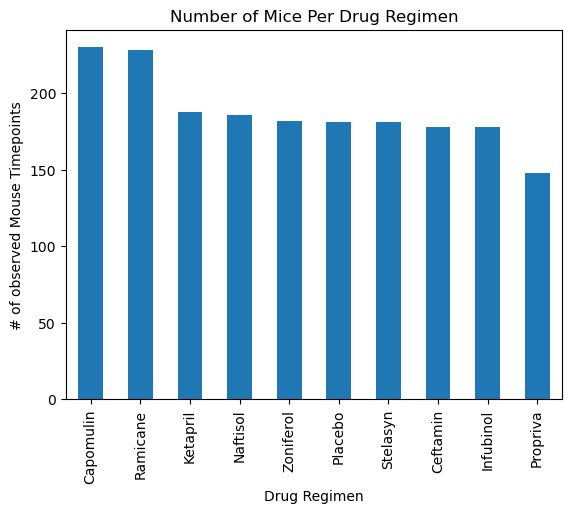

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pandas_bar_data = clean_data_df.groupby('Drug Regimen').count()

# Formating with paramaters
pandas_bar_data = pandas_bar_data['Timepoint'].sort_values(ascending=False).plot( # Plota
    kind="bar",
    title = "Number of Mice Per Drug Regimen",
)
pandas_bar_data.set_xlabel("Drug Regimen")
pandas_bar_data.set_ylabel("# of observed Mouse Timepoints")
plt.show()

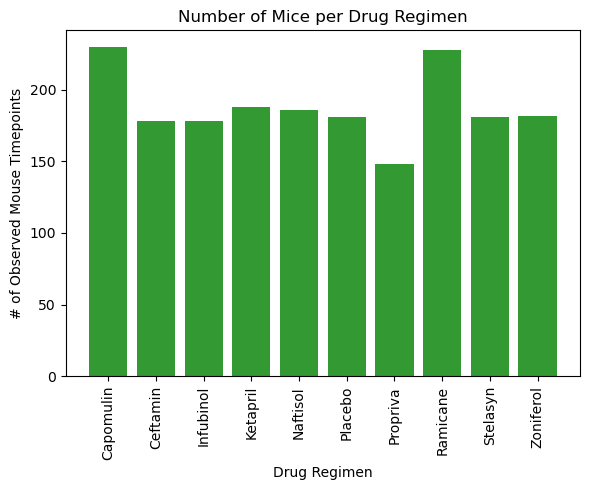

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
pyplot_bar_data = clean_data_df.groupby(['Drug Regimen']).count()[['Mouse ID']]
                                         
# Set x-axis and tick location
x_axis = np.arange(len(pyplot_bar_data)) # 'np': alias improves scientific computing to make code more concise and improve readability
ticks = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(6,5))
plt.bar(x_axis, pyplot_bar_data['Mouse ID'], color='g', alpha=0.8, align="center") # Conditional formatting thus 'green' to represent 'pyplot'.
plt.xticks(ticks, pyplot_bar_data.index.values, rotation="vertical")

# Set a Title and labels
plt.title('Number of Mice per Drug Regimen')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Show the graph
plt.tight_layout()
plt.show()                                                                          

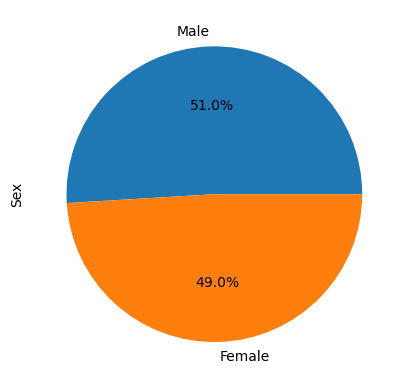

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_data = clean_data_df.groupby('Sex').count()

pie_plot = pie_data['Mouse ID'].sort_values(ascending=False).plot(kind="pie", autopct="%.1f%%") #autopct: parameter formates the percentage labels on each pie wedge
pie_plot.set_ylabel("Sex")
plt.show()

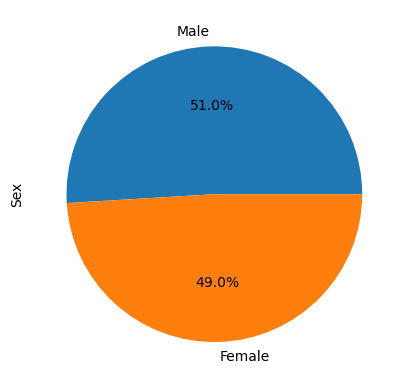

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sorted_pie_data = pie_data['Mouse ID'].sort_values(ascending=False)

plt.pie(sorted_pie_data.values, labels=sorted_pie_data.index, autopct="%.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = clean_data_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
updated_merge_df = pd.merge(clean_data_df, last_timepoints, on=['Mouse ID', 'Timepoint'])

# Retrieve and display the maximum timepoint for each mouse
max_timepoint = updated_merge_df.loc[:, ['Mouse ID', 'Timepoint']]
max_timepoint


,Mouse ID,Timepoint
0,k403,45
1,s185,45
2,x401,45
3,m601,45
4,g791,45
...,...,...
243,z314,5
244,z435,10
245,z581,45
246,z795,45


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []
for drug in treatments:
    data = updated_merge_df.loc[updated_merge_df['Drug Regimen'] == drug]
    tumor_data.append(data)

    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    lower_quartile = data['Tumor Volume (mm3)'].quantile(0.25)
    upper_quartile = data['Tumor Volume (mm3)'].quantile(0.75)
    iqr = upper_quartile - lower_quartile
    lower_bounds = lower_quartile - (1.5*iqr)
    upper_bounds = upper_quartile + (1.5*iqr)

    # Determine outliers by using upper and lower bounds
    outliers = data.loc[(
        data['Tumor Volume (mm3)'] < lower_bounds) | (data['Tumor Volume (mm3)'] > upper_bounds)]
    
    # Display the IQR and outliers for each treatment group
    print(f"{drug}'s potential outliers: {outliers['Tumor Volume (mm3)']}")
    print(f"{drug}'s IQR: {round(iqr, 3)}\n")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Capomulin's IQR: 7.782

Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's IQR: 9.099

Infubinol's potential outliers: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Infubinol's IQR: 11.477

Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's IQR: 15.578



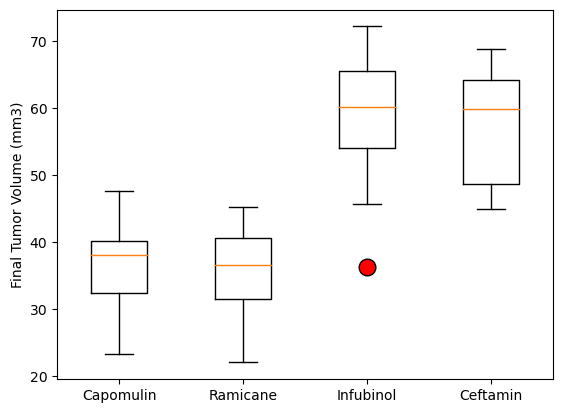

In [21]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
tumor_df = pd.DataFrame({
    'Capomulin': tumor_data[0]['Tumor Volume (mm3)'].reset_index(drop=True),
    'Ramicane': tumor_data[1]['Tumor Volume (mm3)'].reset_index(drop=True),
    'Infubinol': tumor_data[2]['Tumor Volume (mm3)'].reset_index(drop=True),
    'Ceftamin': tumor_data[3]['Tumor Volume (mm3)'].reset_index(drop=True)})

plt.boxplot(tumor_df, labels=treatments, flierprops={'marker': 'o', 'markersize':12, 'markerfacecolor':'red'})
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

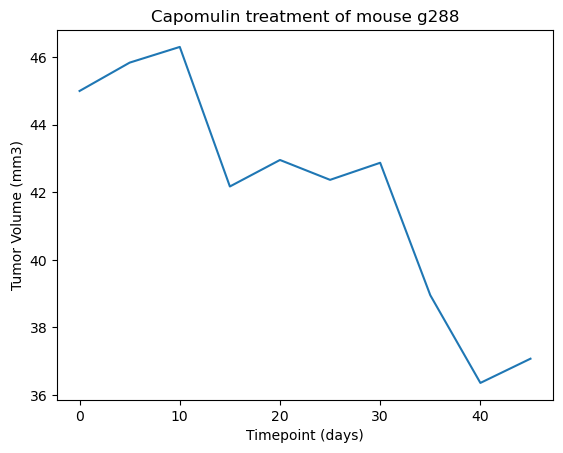

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
chosen_one = 'g288' # Male mouse with Capomulin treatment
tumor_time = clean_data_df.loc[clean_data_df['Mouse ID'] == chosen_one, ['Tumor Volume (mm3)', 'Timepoint']]
tumor_time = tumor_time.set_index('Timepoint')

line_plot = tumor_time.plot(kind="line", 
                            legend=False, 
                            title=f"Capomulin treatment of mouse {chosen_one}") # Mouse 'g288'
line_plot.set_xlabel("Timepoint (days)")
line_plot.set_ylabel("Tumor Volume (mm3)")
plt.show()

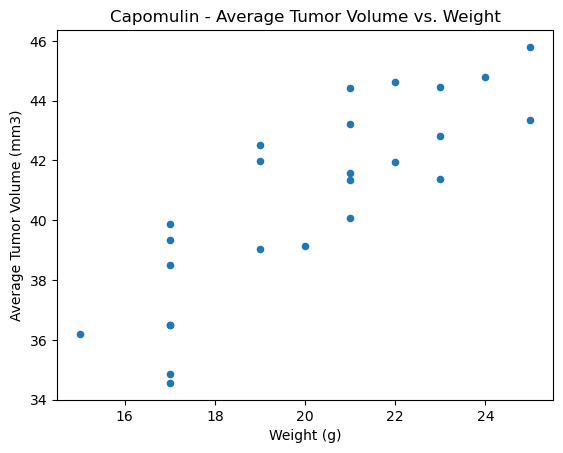

In [26]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
tumor_weight = clean_data_df.loc[
    clean_data_df['Drug Regimen'] == "Capomulin", ['Mouse ID', 'Tumor Volume (mm3)', 'Weight (g)']]
average_volume = tumor_weight.groupby('Mouse ID').mean().reset_index()

scatter_plot = average_volume.plot(
    kind="scatter",
    x='Weight (g)',
    y='Tumor Volume (mm3)', 
    title="Capomulin - Average Tumor Volume vs. Weight")
scatter_plot.set_ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and size of the average tumor volume is 0.84



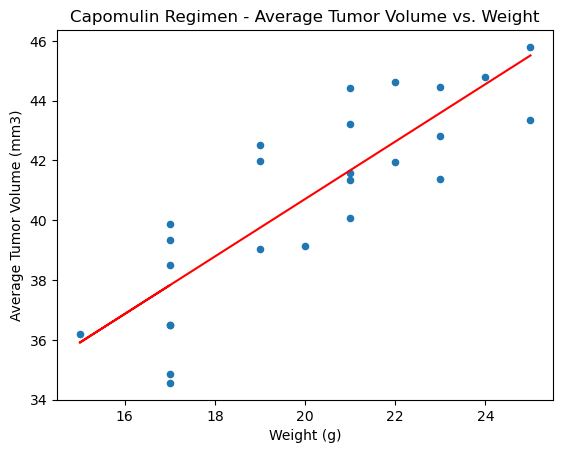

In [27]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Linear Regression Model
# Set vairables to test:
x_values = tumor_weight['Weight (g)']
y_values = tumor_weight['Tumor Volume (mm3)']

# Calculate correlation
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regression_values = x_values * slope + intercept
correlation = st.pearsonr(average_volume['Weight (g)'], average_volume['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and size of the average tumor volume is {round(correlation[0], 2)}\n")

# Plot the linear regression model on the scatter plot
scatter_plot = average_volume.plot(
    kind="scatter",
    x='Weight (g)', 
    y='Tumor Volume (mm3)', 
    title="Capomulin Regimen - Average Tumor Volume vs. Weight")
scatter_plot.set_ylabel("Average Tumor Volume (mm3)")
plt.plot(x_values, regression_values, color="red")
plt.show()